In [25]:
!pip install emoji

  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171032 sha256=4e2a11b8c1375c03deab161cf59653f0f2d1f6c09c40f9539916824b84abf225
  Stored in directory: c:\users\sabim\appdata\local\pip\cache\wheels\5e\8c\80\c3646df8201ba6f5070297fe3779a4b70265d0bfd961c15302
Successfully built emoji


In [2]:
pip list

Package                            Version
---------------------------------- -------------------
absl-py                            0.14.1
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.9.12
anaconda-project                   0.8.3
argh                               0.26.2
asn1crypto                         1.3.0
astroid                            2.4.2
astropy                            4.0.1.post1
astunparse                         1.6.3
asyncio                            3.4.3
atomicwrites                       1.4.0
attrs                              19.3.0
Augmentor                          0.2.9
autopep8                           1.5.3
Babel                              2.8.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bcrypt                      

QDarkStyle                         2.8.1
QtAwesome                          0.7.2
qtconsole                          4.7.5
QtPy                               1.9.0
regex                              2020.6.8
requests                           2.25.1
requests-oauthlib                  1.3.0
rope                               0.17.0
rsa                                4.7.2
Rtree                              0.9.4
ruamel-yaml                        0.15.87
scikit-image                       0.16.2
scikit-learn                       0.23.1
scipy                              1.5.0
seaborn                            0.10.1
selenium                           3.141.0
Send2Trash                         1.5.0
setuptools                         49.2.0.post20200714
simplegeneric                      0.8.1
singledispatch                     3.4.0.3
sip                                4.19.13
six                                1.15.0
smart-open                         5.2.1
snowballstemmer           

In [2]:
# For dataframes
import pandas as pd 

# For numerical arrays
import numpy as np 

# For visualizations
import matplotlib.pyplot as plt

# For regular expressions
import re

# For getting stopwords
from spacy.lang.en.stop_words import STOP_WORDS

# For handling string
import string

# For performing mathematical operations
import math

# For dictionary related activites
from collections import defaultdict

# For counting actions (EDA)
from collections import  Counter

# For count vectorisation (EDA)
from sklearn.feature_extraction.text import CountVectorizer


In [3]:
# For generating random integers
from random import randint

#For making wordclouds
from wordcloud import WordCloud 

# For plotting
import seaborn as sns

print("Necessary libraries imported")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


Necessary libraries imported


In [4]:
# Read train.csv file

df=pd.read_csv('train.csv')
df.head(10)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
5,00004f9a462a357c33be,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0
6,00005059a06ee19e11ad,Why does Quora automatically ban conservative ...,0
7,0000559f875832745e2e,Is it crazy if I wash or wipe my groceries off...,0
8,00005bd3426b2d0c8305,"Is there such a thing as dressing moderately, ...",0
9,00006e6928c5df60eacb,Is it just me or have you ever been in this ph...,0


In [5]:
print('Total number of rows in dataset: ',len(df),'Rows\n')
print('Dataset column names: ')
print(df.columns)
print('\nNull Statistics (in %): ')
print(df.isnull().sum()* 100 / len(df))
print('\nDataset brief description : ')
print(df.describe())
print('\nEssay prompt frequency: ')
print(df.groupby("target").describe().loc[:,[('question_text',  'count'),('question_text', 'unique')]])

Total number of rows in dataset:  1306122 Rows

Dataset column names: 
Index(['qid', 'question_text', 'target'], dtype='object')

Null Statistics (in %): 
qid              0.0
question_text    0.0
target           0.0
dtype: float64

Dataset brief description : 
             target
count  1.306122e+06
mean   6.187018e-02
std    2.409197e-01
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    0.000000e+00
max    1.000000e+00

Essay prompt frequency: 
       question_text         
               count   unique
target                       
0            1225312  1225312
1              80810    80810



Min/Max statistics for count of word/char in question_text: 
MAX	 1017 characters, 134 words
MIN	 1 character(s), 1 word(s)
Pie Chart- Target Categories


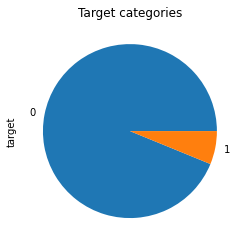

In [6]:
print('\nMin/Max statistics for count of word/char in question_text: ')
print('MAX\t',max(df.question_text.apply(lambda x: len(x))),'characters,',
     max(df.question_text.apply(lambda x: len(x.split()))), 'words')
print('MIN\t',min(df.question_text.apply(lambda x: len(x))),'character(s),',
     min(df.question_text.apply(lambda x: len(x.split()))), 'word(s)')

print('Pie Chart- Target Categories')
df.target.value_counts().plot(title='Target categories',kind='pie')

ScatterPlot - Target vs Avg word length


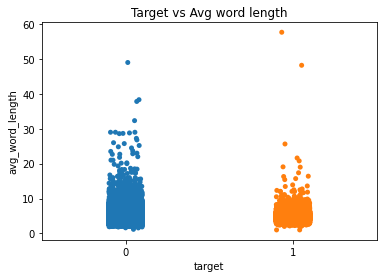

In [7]:
def get_avg_length(essay):
    summ=0
    for word in essay.split():
        summ+=len(word)
    return round(summ/len(essay.split()),2)

df['avg_word_length']=df.question_text.apply(lambda x: get_avg_length(x))
print("ScatterPlot - Target vs Avg word length")
plt.plot(figsize=(10,10)) 
plt.title('Target vs Avg word length')

sns.stripplot(data=df,
    x="target", y="avg_word_length")

plt.show()

Boxplot Target vs total words


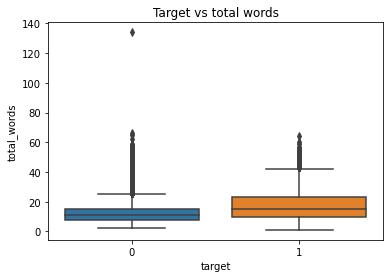

In [8]:
df['total_words']=df.question_text.apply(lambda x: len(x.split()))
print("Boxplot Target vs total words")
plt.plot(figsize=(8,15)) 
plt.title('Target vs total words')

sns.boxplot(data=df,
    x="target", y="total_words")
plt.show()

#### Unigram analysis¶

Find Stop-Word Freuqency


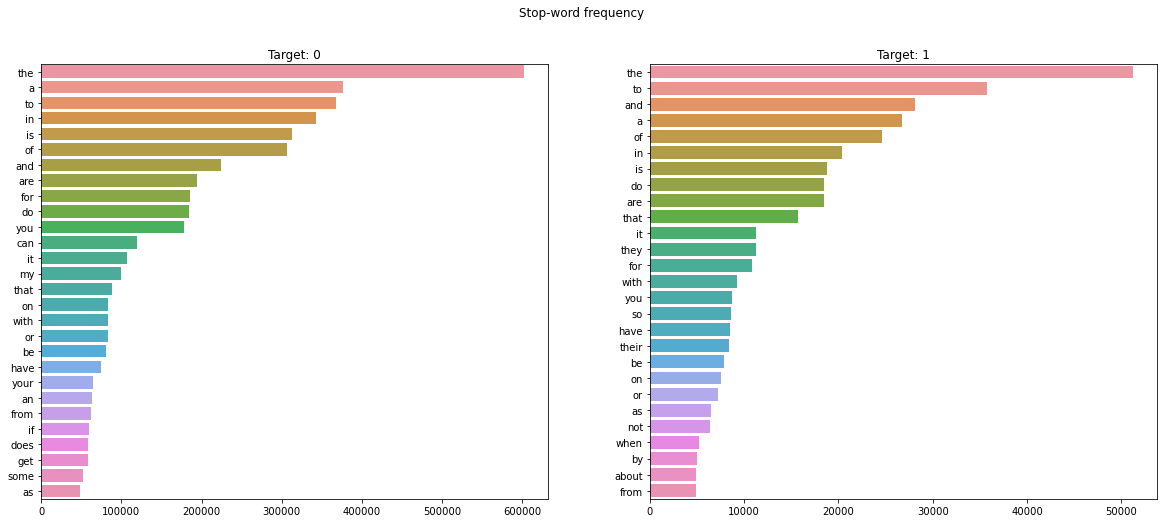

In [9]:
print("Find Stop-Word Freuqency")

fig, axes = plt.subplots(1,len(df.target.unique()), figsize=(20,8))
fig.suptitle('Stop-word frequency')

for index,target in enumerate(df.target.unique()):
    dct=defaultdict(int) 
    curdf=df[df['target']==target]  
    
    allwordsarr=curdf.question_text.str.cat().split() #First, we join all strings from the question_text column,
    # then we split em all so that we get an array of all words, which could be counted
    counter=Counter(allwordsarr)
    most=counter.most_common()
    x=[]
    y=[]
    for word,count in most[:30]:
        if (word in STOP_WORDS) :
            x.append(word)
            y.append(count)
    sns.barplot(ax=axes[index],x=y,y=x)
    axes[index].set_title("Target: "+str(target))

Let's plot Wordcloud


Text(0.5, 0.98, 'Wordcloud')

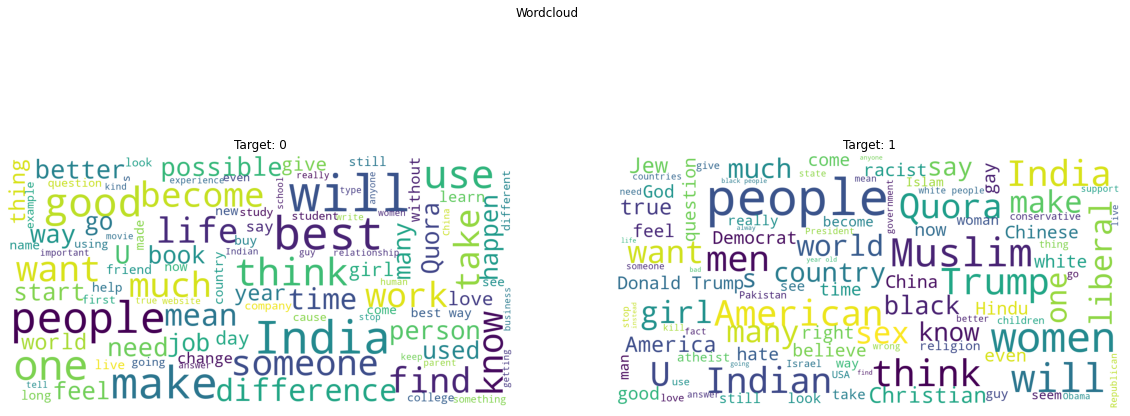

In [10]:
print("Let's plot Wordcloud")

fig, axes = plt.subplots(1,len(df.target.unique()), figsize=(20,8))

    
for index,target in enumerate(df.target.unique()):
    dct=defaultdict(int) 
    curdf=df[df['target']==target]  
    
    df_fullstring=" ".join(curdf.question_text.str.cat().split()) #first, we join all strings of column,
                                    # then split by space, then join again because we want a full string here
    wordcloud = WordCloud(background_color='white',max_words=100,
                      max_font_size=40,
                      scale=3,
                      random_state=1).generate(df_fullstring)

    axes[index].imshow(wordcloud)
    axes[index].set_title('Target: '+str(target))
    axes[index].axis('off')
    
fig.suptitle('Wordcloud')

Most commonly occcuring words in all categories


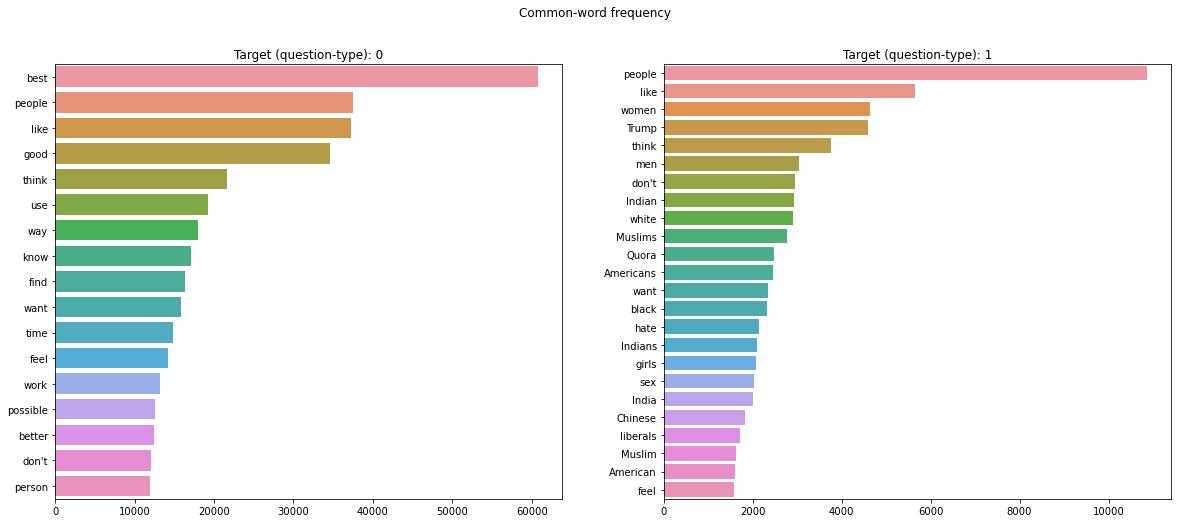

In [11]:
print("Most commonly occcuring words in all categories")

fig, axes = plt.subplots(1,len(df.target.unique()), figsize=(20,8))
fig.suptitle('Common-word frequency')

for index,target in enumerate(df.target.unique()):
    dct=defaultdict(int) 
    curdf=df[df['target']==target]  
    allwordsarr=curdf.question_text.str.cat().split()
    counter=Counter(allwordsarr)
    most=counter.most_common()
    x=[]
    y=[]
    for word,count in most[:100]:
        if (word.lower() not in STOP_WORDS):
            x.append(word)
            y.append(count)
    sns.barplot(ax=axes[index],x=y,y=x)
    axes[index].set_title("Target (question-type): "+str(target))

#### Bigram analysis

Bigram analysis


<ipython-input-12-9913b79e53a3>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


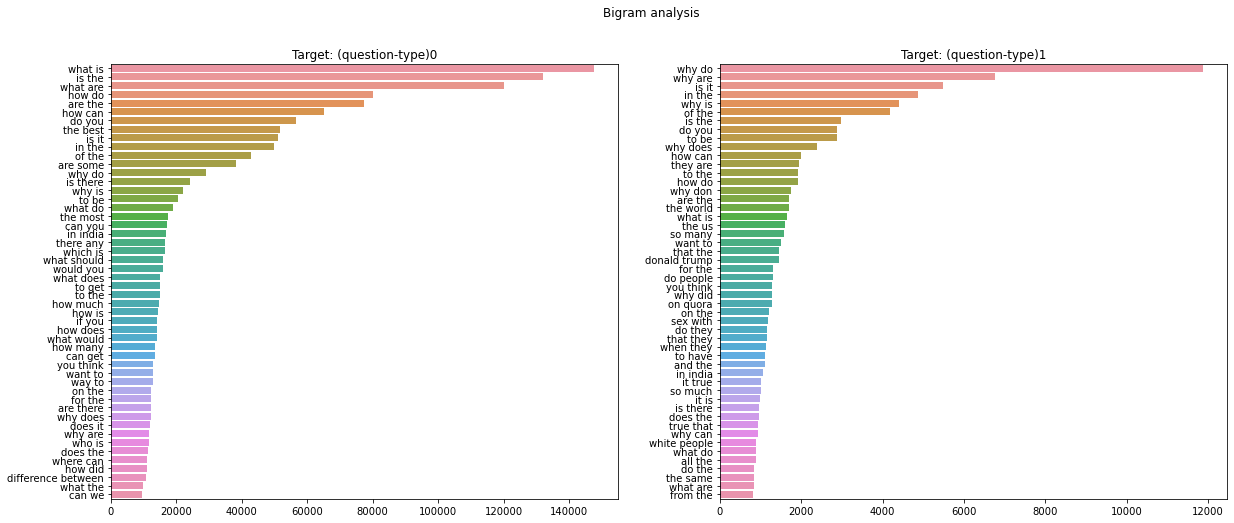

In [12]:
def get_top_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

print("Bigram analysis")

fig, axes = plt.subplots(1,len(df.target.unique()), figsize=(20,8))
fig.suptitle('Bigram analysis')

for index,target in enumerate(df.target.unique()):
    dct=defaultdict(int) 
    top_bigrams=get_top_bigrams(df[df['target']==target].question_text)[:50]
    x,y=map(list,zip(*top_bigrams))
    sns.barplot(ax=axes[index],x=y,y=x)
    axes[index].set_title("Target: (question-type)"+str(target))

fig.show()

#### Non-English Character Analysis

C:\Users\sabim\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


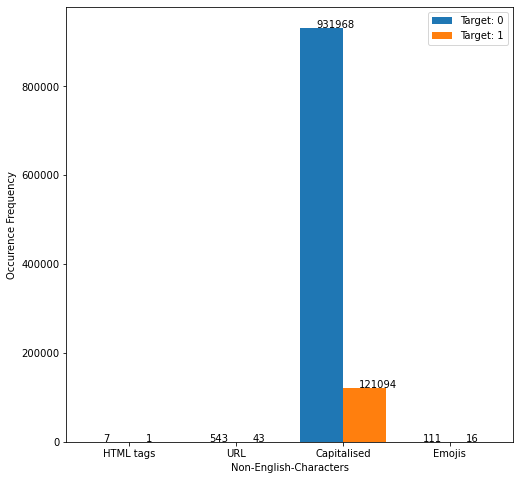

In [13]:
from emoji import UNICODE_EMOJI

def count_emojis(s):
    count = 0
    for emoji in UNICODE_EMOJI['en']:
        count += s.count(emoji)
    return count

allvalues=[]
plt.figure(figsize=(8,8))
for index,target in enumerate(df.target.unique()):
    cur_dict=dict()
    curdf=df[df['target']==target]  
    
    curdf.question_text=curdf.question_text.apply(lambda x: str(x))
    df_caps=" ".join(curdf.question_text.str.cat().split())
    curdf.question_text=curdf.question_text.apply(lambda x: x.lower())
    df_fullstring=curdf.question_text.str.cat()
    cur_dict['HTML tags']=len(re.findall("<.*>",df_fullstring))
    cur_dict['URL']=len(re.findall("http",df_fullstring))
    cur_dict['Capitalised']=len(re.findall("[^\.!\?]\s[A-Z]\w+[\W\?:\.!-_]",df_caps))
    cur_dict['Emojis']=count_emojis(df_caps)
    
    x_keys = list(cur_dict.keys())
    y_values = list(cur_dict.values())
    x_axis = np.arange(len(x_keys))
    bars=plt.bar(x_axis - 0.2+0.4*index, y_values,0.4, label = 'Target: '+str(target))
    allvalues+=y_values
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x()+0.15, yval+5, yval)


    
plt.xticks(x_axis, x_keys)
plt.xlabel("Non-English-Characters")
plt.ylabel("Occurence Frequency")
plt.legend()
plt.show()

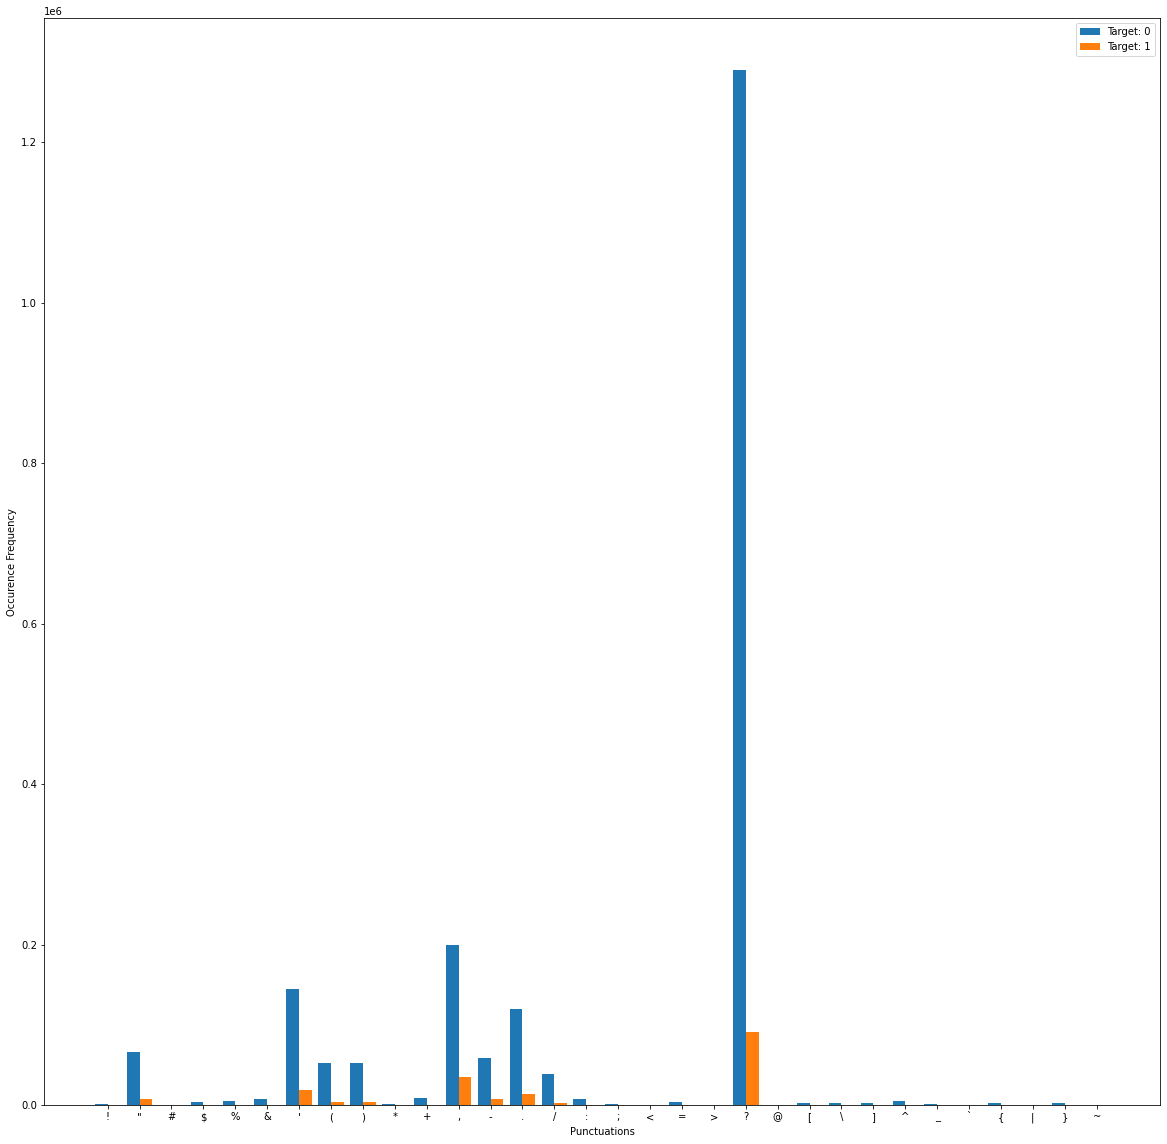

In [14]:
def count_punctuations(s):
    arr=list()
    for punct in string.punctuation:
        count = s.count(punct)
        arr.append(count)
    return arr

allvalues=[]
plt.figure(figsize=(20,20))
for index,target in enumerate(df.target.unique()):
    cur_dict=dict()
    curdf=df[df['target']==target]  
    
    curdf.question_text=curdf.question_text.apply(lambda x: str(x))
    df_fullstring=curdf.question_text.str.cat()
    
    x_keys = string.punctuation
    y_values = count_punctuations(df_fullstring)
    x_axis = np.arange(len(x_keys))
    bars=plt.bar(x_axis - 0.2+0.4*index, y_values,0.4, label = 'Target: '+str(target))
    


    
plt.xticks(x_axis, x_keys)
plt.xlabel("Punctuations")
plt.ylabel("Occurence Frequency")
plt.legend()
plt.show()

#### EDA: the conclusion

We did not find any null rows in the data.
Similarly, there were no duplicate rows present in data.
- Also, we did not find any missing values in data, hence no need to handle anything here.
- Interestingly, we found heavy amount of data imbalance, which was highly biased towards sincere type questions. The - dataset had almost ~93% of target=0 and ~7% of target=1.
- There was a clear bias present in data, i.e., we can see questions targeting specific community and geographic location specific. Hence the terms present in questions were highly skewed towards a category.
- Both unigram and bigram analysis shown the abundance of Stop Words.
- We were unable to draw a clear relation among question length, average word length and target class (they were completely sparse in nature).
- We have a few HTML tags, and a few HTTP URLs present in question text, but that didn’t have any trend present in either of the question category.
- We found only standard emoticons in our dataset like - ™ and ®
- The dataset was fully loaded with punctuations, keeping them could hopefully contribute to the knowledge mining process.
